# Asian Market Quant Project

## Simple PM Overview

**Author:** Wong Wai Hin  
**Date:** July 19, 2025


## Technical Imports


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))
from src.mappings.asset_class_mapping import ASSET_MAPPING, RISK_BUDGET

print("Libraries loaded successfully")

Libraries loaded successfully


## 1. Asset Class Mapping

I first categorised the tickers into five main asset classes for systematic analysis and risk budgeting.


In [ ]:
# Create a simple table of asset classes
asset_classes = []

for name, details in ASSET_MAPPING.items():
    # Format the ticker range
    first_ticker = details['tickers'][0].split()[0]
    last_ticker = details['tickers'][-1].split()[0]
    ticker_range = f"{first_ticker} ... {last_ticker}"
    
    # Add to our list
    asset_classes.append({
        'Asset Class': name.replace('_', ' ').title(),
        'Ticker Range': ticker_range,
        'Description': details['description'],
        'Currency': details['currency'],
        'Comment': details['comment']
    })

# Create DataFrame
asset_class_df = pd.DataFrame(asset_classes)

# Display with index starting from 1 (for display only)
asset_class_df.index = range(1, len(asset_class_df) + 1)
asset_class_df

,Asset Class,Ticker Range,Description,Currency,Comment
0,Emerging Asia Equity,MXAP ... FMETF,Emerging-Asia equity indices & ETF,Mostly USD,Regional beta + macro sensitivity
1,Commodities,GOLDS ... S,"Commodities (Gold spot, Brent front-month, gen...",USD,"Adds inflation hedge, carry via roll"
2,Developed Equity,SPX ... NKY,Developed-market equity benchmarks,USD / JPY,Good stress-test proxies
3,Fx Crosses,USDPHP ... USDJPY,EM & DM FX crosses vs USD,USD notional,Carry + momentum rich
4,Sovereign Yields,USGG5YR ... GTUSDPH5Y,Sovereign & quasi-sovereign 5-yr yields,USD & PHP,Duration + EM credit risk


## 2. Risk Budget Allocation

Based on our asset class mapping, we propose the following risk budget allocation for portfolio construction.


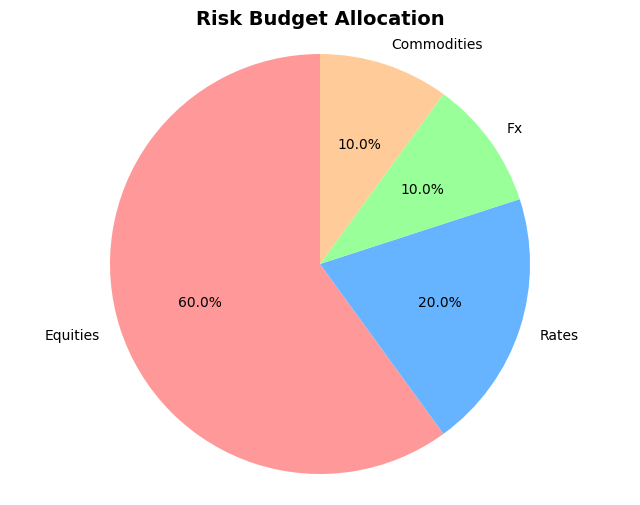

,Asset Class,Allocation (%)
0,Equities,60.0
1,Rates,20.0
2,Fx,10.0
3,Commodities,10.0


In [5]:
# Create a simple pie chart of the risk budget
labels = [bucket.title() for bucket in RISK_BUDGET.keys()]
sizes = [allocation * 100 for allocation in RISK_BUDGET.values()]

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Risk Budget Allocation', fontsize=14, fontweight='bold')
plt.show()

# Also display as a simple table
risk_budget_df = pd.DataFrame({
    'Asset Class': labels,
    'Allocation (%)': sizes
})
risk_budget_df

## 3. Asset Class Descriptions


In [6]:
# Show tickers in each asset class
for name, details in ASSET_MAPPING.items():
    print(f"\n{name.replace('_', ' ').title()}:")
    print(f"Description: {details['description']}")
    print(f"Tickers:")
    for ticker in details['tickers']:
        print(f"  • {ticker}")


Emerging Asia Equity:
Description: Emerging-Asia equity indices & ETF
Tickers:
  • MXAP Index
  • MXAPJ Index
  • MXAS Index
  • MXASJ Index
  • PCOMP Index
  • JCI Index
  • FBMKLCI Index
  • SET Index
  • STI Index
  • NU710465 Index
  • EPHE US Index
  • FMETF PM Equity

Commodities:
Description: Commodities (Gold spot, Brent front-month, generic Softs, Philippines gold ETF)
Tickers:
  • GOLDS Index
  • CO1 Comdty
  • S 1 Comdty

Developed Equity:
Description: Developed-market equity benchmarks
Tickers:
  • SPX Index
  • NKY Index

Fx Crosses:
Description: EM & DM FX crosses vs USD
Tickers:
  • USDPHP Index
  • USDMYR Index
  • USDIDR Index
  • USDSGD Index
  • USDJPY Curncy

Sovereign Yields:
Description: Sovereign & quasi-sovereign 5-yr yields
Tickers:
  • USGG5YR Index
  • GTPHP5yr Corp
  • GTUSDPH5Y Corp


## 4. Number of Tickers by Asset Class


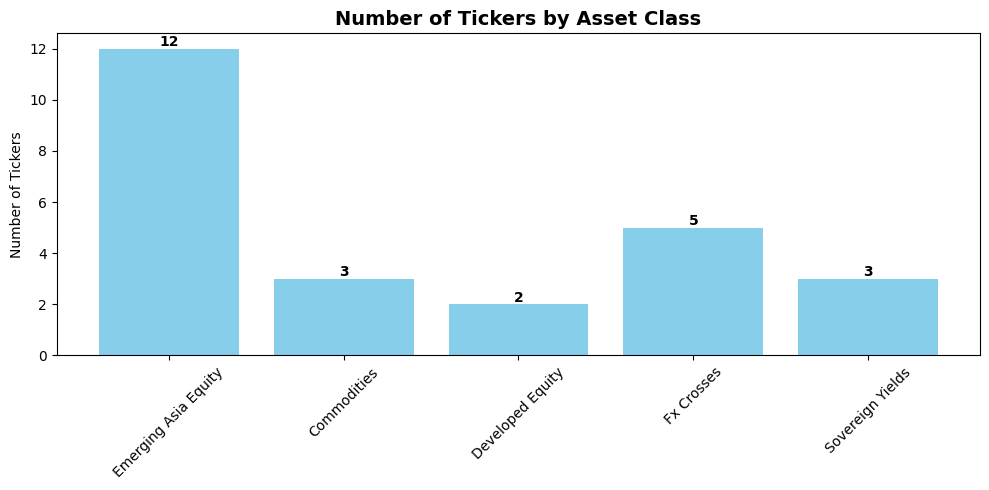

In [7]:
# Count tickers by asset class
ticker_counts = {name.replace('_', ' ').title(): len(details['tickers']) 
                for name, details in ASSET_MAPPING.items()}

# Plot a simple bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(ticker_counts.keys(), ticker_counts.values(), color='skyblue')

# Add the count numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            str(int(height)), ha='center', fontweight='bold')

plt.title('Number of Tickers by Asset Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Generate LaTeX output
latex_output = []

# Detailed asset class descriptions in LaTeX format
for name, details in ASSET_MAPPING.items():
    section_name = name.replace('_', ' ').title()
    ticker_count = len(details['tickers'])
    
    latex_output.append(f"\\subsection{{{section_name} ({ticker_count} instruments)}}")
    latex_output.append(f"{details['description']}\\\\")
    latex_output.append("\\begin{itemize}")
    
    # Add currency info if available
    if 'currency' in details:
        latex_output.append(f"\\item \\textbf{{Currency}}: {details['currency']}")
    
    # Add comment if available
    if 'comment' in details:
        latex_output.append(f"\\item \\textbf{{Strategy Rationale}}: {details['comment']}")
    
    # Add tickers
    latex_output.append("\\item \\textbf{Instruments}:")
    latex_output.append("\\begin{itemize}")
    for ticker in details['tickers']:
        latex_output.append(f"\\item {ticker}")
    latex_output.append("\\end{itemize}")
    
    latex_output.append("\\end{itemize}")
    latex_output.append("")

# Save the LaTeX content
latex_content = "\n".join(latex_output)
print("Generated LaTeX content for asset class mapping. Ready to update the .tex file.")

            SPX Index  NKY Index
Date                            
1988-01-04     255.94   21217.04
1988-01-05     258.63   21575.28
1988-01-06     258.89   22790.50
1988-01-07     261.07   22792.13
1988-01-08     243.40   22872.56
DatetimeIndex(['1988-01-04', '1988-01-05', '1988-01-06', '1988-01-07',
               '1988-01-08', '1988-01-11', '1988-01-12', '1988-01-13',
               '1988-01-14', '1988-01-15',
               ...
               '2025-03-13', '2025-03-14', '2025-03-17', '2025-03-18',
               '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24',
               '2025-03-25', '2025-03-26'],
              dtype='datetime64[ns]', name='Date', length=9713, freq='B')
['SPX Index', 'NKY Index']


<Axes: title={'center': 'Developed-Equity Daily Returns'}, xlabel='Date'>

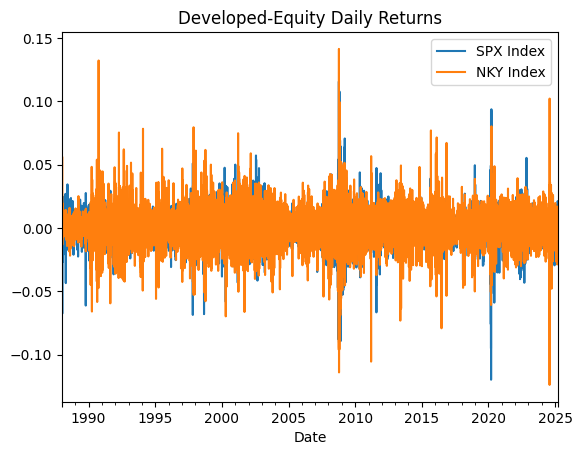

In [6]:
import pandas as pd
from pathlib import Path

# 1. Identify where the notebook is running
notebook_dir = Path.cwd()

# 2. Assume project root is one level up (adjust .parent.parent if deeper)
project_root = notebook_dir.parent

# 3. Build the pickle path
pickle_path = project_root / 'data' / 'processed' / 'developed_equity.pkl'

# 4. Load
df_dev = pd.read_pickle(pickle_path)

# 5. Inspect
print(df_dev.head())
print(df_dev.index)
print(df_dev.columns.tolist())

# 6. Continue with returns/plots...
returns = df_dev.pct_change().dropna()
returns.plot(title="Developed-Equity Daily Returns")


## 5. Next Steps

With this asset class mapping complete, we will proceed to:

1. Implement data cleaning and currency normalization
2. Perform exploratory analysis to identify correlations and regime changes
3. Design signal prototypes for each asset class
4. Apply hierarchical risk parity within our risk budget framework


            GOLDS Index  CO1 Comdty  S 1 Comdty
Date                                           
1988-01-04        480.5         NaN      616.25
1988-01-05        475.5         NaN      614.25
1988-01-06        481.4         NaN      626.00
1988-01-07        483.5         NaN      619.75
1988-01-08        483.9         NaN      623.50
DatetimeIndex(['1988-01-04', '1988-01-05', '1988-01-06', '1988-01-07',
               '1988-01-08', '1988-01-11', '1988-01-12', '1988-01-13',
               '1988-01-14', '1988-01-15',
               ...
               '2025-03-13', '2025-03-14', '2025-03-17', '2025-03-18',
               '2025-03-19', '2025-03-20', '2025-03-21', '2025-03-24',
               '2025-03-25', '2025-03-26'],
              dtype='datetime64[ns]', name='Date', length=9713, freq='B')
['GOLDS Index', 'CO1 Comdty', 'S 1 Comdty']


<Axes: title={'center': 'Commodities Daily Returns'}, xlabel='Date'>

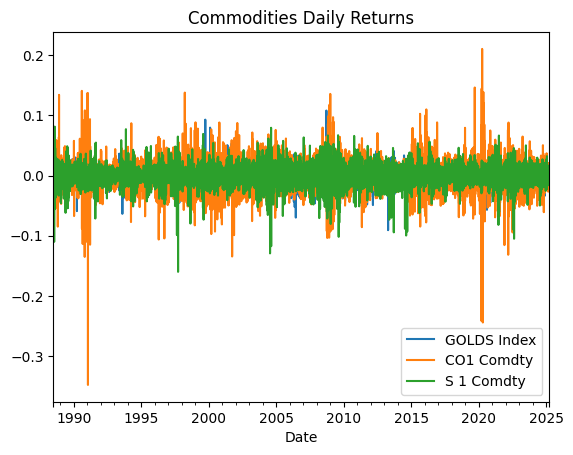

In [7]:
import pandas as pd
from pathlib import Path

# 1. Identify where the notebook is running
notebook_dir = Path.cwd()

# 2. Assume project root is one level up
project_root = notebook_dir.parent

# 3. Build the pickle path for commodities
commodities_pkl = project_root / 'data' / 'processed' / 'commodities.pkl'

# 4. Load the commodities DataFrame
df_comm = pd.read_pickle(commodities_pkl)

# 5. Inspect its contents
print(df_comm.head())           # first few rows
print(df_comm.index)            # Date index
print(df_comm.columns.tolist()) # list of commodity tickers

# 6. Example: compute daily returns
comm_returns = df_comm.pct_change().dropna()

# 7. Plot the returns
comm_returns.plot(title="Commodities Daily Returns")
